<a href="https://colab.research.google.com/github/ducpb/dog-cat-kaggle/blob/master/test_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
!ls

drive  sample_data


In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
batch_size = 20
height, width = (150,150)

train_generator = train_datagen.flow_from_directory(
        './drive/My Drive/Colab Notebooks/data/train',
        target_size=(height, width),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        './drive/My Drive/Colab Notebooks/data/validation',
        target_size=(height, width),
        batch_size=batch_size,
        class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
in_put = layers.Input(shape=(150,150,3))
x = layers.Conv2D(24, 3, activation='relu')(in_put)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(48, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(96, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
out_put = layers.Dense(2, activation='softmax')(x)

model = Model(in_put, out_put)
model.summary();

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 24)      672       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 48)        10416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 96)        41568     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 96)        0     

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['acc'])

In [0]:
H =model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/20
100/100 - 442s - loss: 0.6198 - acc: 0.6530 - val_loss: 0.5982 - val_acc: 0.6630
Epoch 2/20
100/100 - 11s - loss: 0.5485 - acc: 0.7240 - val_loss: 0.5802 - val_acc: 0.6860
Epoch 3/20
100/100 - 11s - loss: 0.5067 - acc: 0.7640 - val_loss: 0.5927 - val_acc: 0.6740
Epoch 4/20
100/100 - 11s - loss: 0.4669 - acc: 0.7780 - val_loss: 0.5893 - val_acc: 0.6990
Epoch 5/20
100/100 - 11s - loss: 0.4123 - acc: 0.8180 - val_loss: 0.5566 - val_acc: 0.7160
Epoch 6/20
100/100 - 11s - loss: 0.3839 - acc: 0.8400 - val_loss: 0.5350 - val_acc: 0.7430
Epoch 7/20
100/100 - 11s - loss: 0.3460 - acc: 0.8530 - val_loss: 0.5727 - val_acc: 0.7220
Epoch 8/20
100/100 - 11s - loss: 0.3089 - acc: 0.8715 - val_loss: 0.5930 - val_acc: 0.7070
Epoch 9/20
100/100 - 11s - loss: 0.2742 - acc: 0.8960 - val_loss: 0.5528 - val_acc: 0.7520
Epoch 10/20
100/100 - 11s - loss: 0.2438 - acc: 0.9090 - val_loss: 0.5557 - val_acc: 0.7510
Epoch 11/20
100/100 - 12s - loss: 0.2186 - acc: 0.9225 - val_loss: 0.6112 - val_acc: 0.7

Text(0.5, 1.0, 'Training and validation loss')

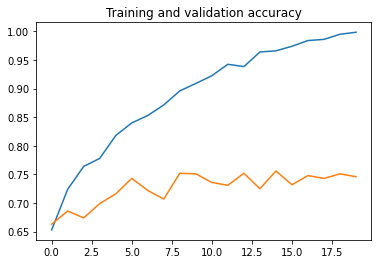

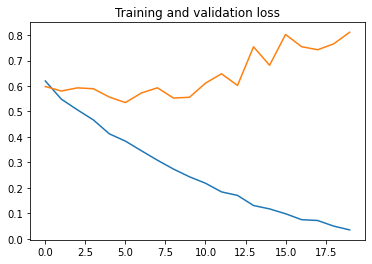

In [0]:
acc = H.history['acc']
val_acc = H.history['val_acc']
loss = H.history['loss']
val_loss = H.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')